## Credit Card Routing for Online Purchase via Predictive Modelling

### Load Data

In [3]:
# Import Libraries 

import pandas as pd
import numpy as np 
import category_encoders as ce 

In [4]:
data = pd.read_excel("data/PSP_Jan_Feb_2019.xlsx")


data.head()

,Unnamed: 0,tmsp,country,amount,success,PSP,3D_secured,card
0,0,2019-01-01 00:01:11,Germany,89,0,UK_Card,0,Visa
1,1,2019-01-01 00:01:17,Germany,89,1,UK_Card,0,Visa
2,2,2019-01-01 00:02:49,Germany,238,0,UK_Card,1,Diners
3,3,2019-01-01 00:03:13,Germany,238,1,UK_Card,1,Diners
4,4,2019-01-01 00:04:33,Austria,124,0,Simplecard,0,Diners


In [5]:
data.shape

(50410, 8)

In [6]:
# Data quality check
print(f"Null values in the data: {data.isnull().sum().sum()}")
print(f"Duplicate values in the data: {data.duplicated().sum()}")
print(f"Data types in the data: {data.dtypes}")


Null values in the data: 0
Duplicate values in the data: 0
Data types in the data: Unnamed: 0             int64
tmsp          datetime64[ns]
country               object
amount                 int64
success                int64
PSP                   object
3D_secured             int64
card                  object
dtype: object


In [7]:
data.drop(columns=["Unnamed: 0"], inplace=True)

In [8]:
# Data Description Numerical

# data.describe(include='all').to_csv("data_description.csv")



In [9]:
data.dtypes

tmsp          datetime64[ns]
country               object
amount                 int64
success                int64
PSP                   object
3D_secured             int64
card                  object
dtype: object

In [10]:
# Remove the column Unnamed: 0 

# data.drop('Unnamed: 0', axis=1, inplace=True)

In [11]:
# Check Null values count in each Column 

data.isna().sum()

tmsp          0
country       0
amount        0
success       0
PSP           0
3D_secured    0
card          0
dtype: int64

Data doesn't have NULL values 

In [12]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50410 entries, 0 to 50409
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   tmsp        50410 non-null  datetime64[ns]
 1   country     50410 non-null  object        
 2   amount      50410 non-null  int64         
 3   success     50410 non-null  int64         
 4   PSP         50410 non-null  object        
 5   3D_secured  50410 non-null  int64         
 6   card        50410 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 2.7+ MB


### Exploratory Data Analysis

#### Univariate Analysis

##### Column :  tmsp

Timestamp of the transaction

##### Date: Feature Extractions 

In [13]:
# Starting and end date of the data

print(f"Start Date: {data['tmsp'].min()}")
print(f"End Date: {data['tmsp'].max()}")

Start Date: 2019-01-01 00:01:11
End Date: 2019-02-28 23:48:19


In [14]:
# From time stamp we can extract use full information like year, month, day, hour, minute, day of week, week of year, quarter, etc.
# This will help us to understand the data better and we can use this information to create new features.
# This can reveal some interesting patterns in the data.


data['year'] = data['tmsp'].dt.year
data['month'] = data['tmsp'].dt.month
data['day'] = data['tmsp'].dt.day
data['hour'] = data['tmsp'].dt.hour
data['minute'] = data['tmsp'].dt.minute
data['day_of_week'] = data['tmsp'].dt.dayofweek
data['week_of_year'] = data['tmsp'].dt.isocalendar().week
data['quarter'] = data['tmsp'].dt.quarter
data['day_of_year'] = data['tmsp'].dt.dayofyear

<Axes: xlabel='quarter', ylabel='count'>

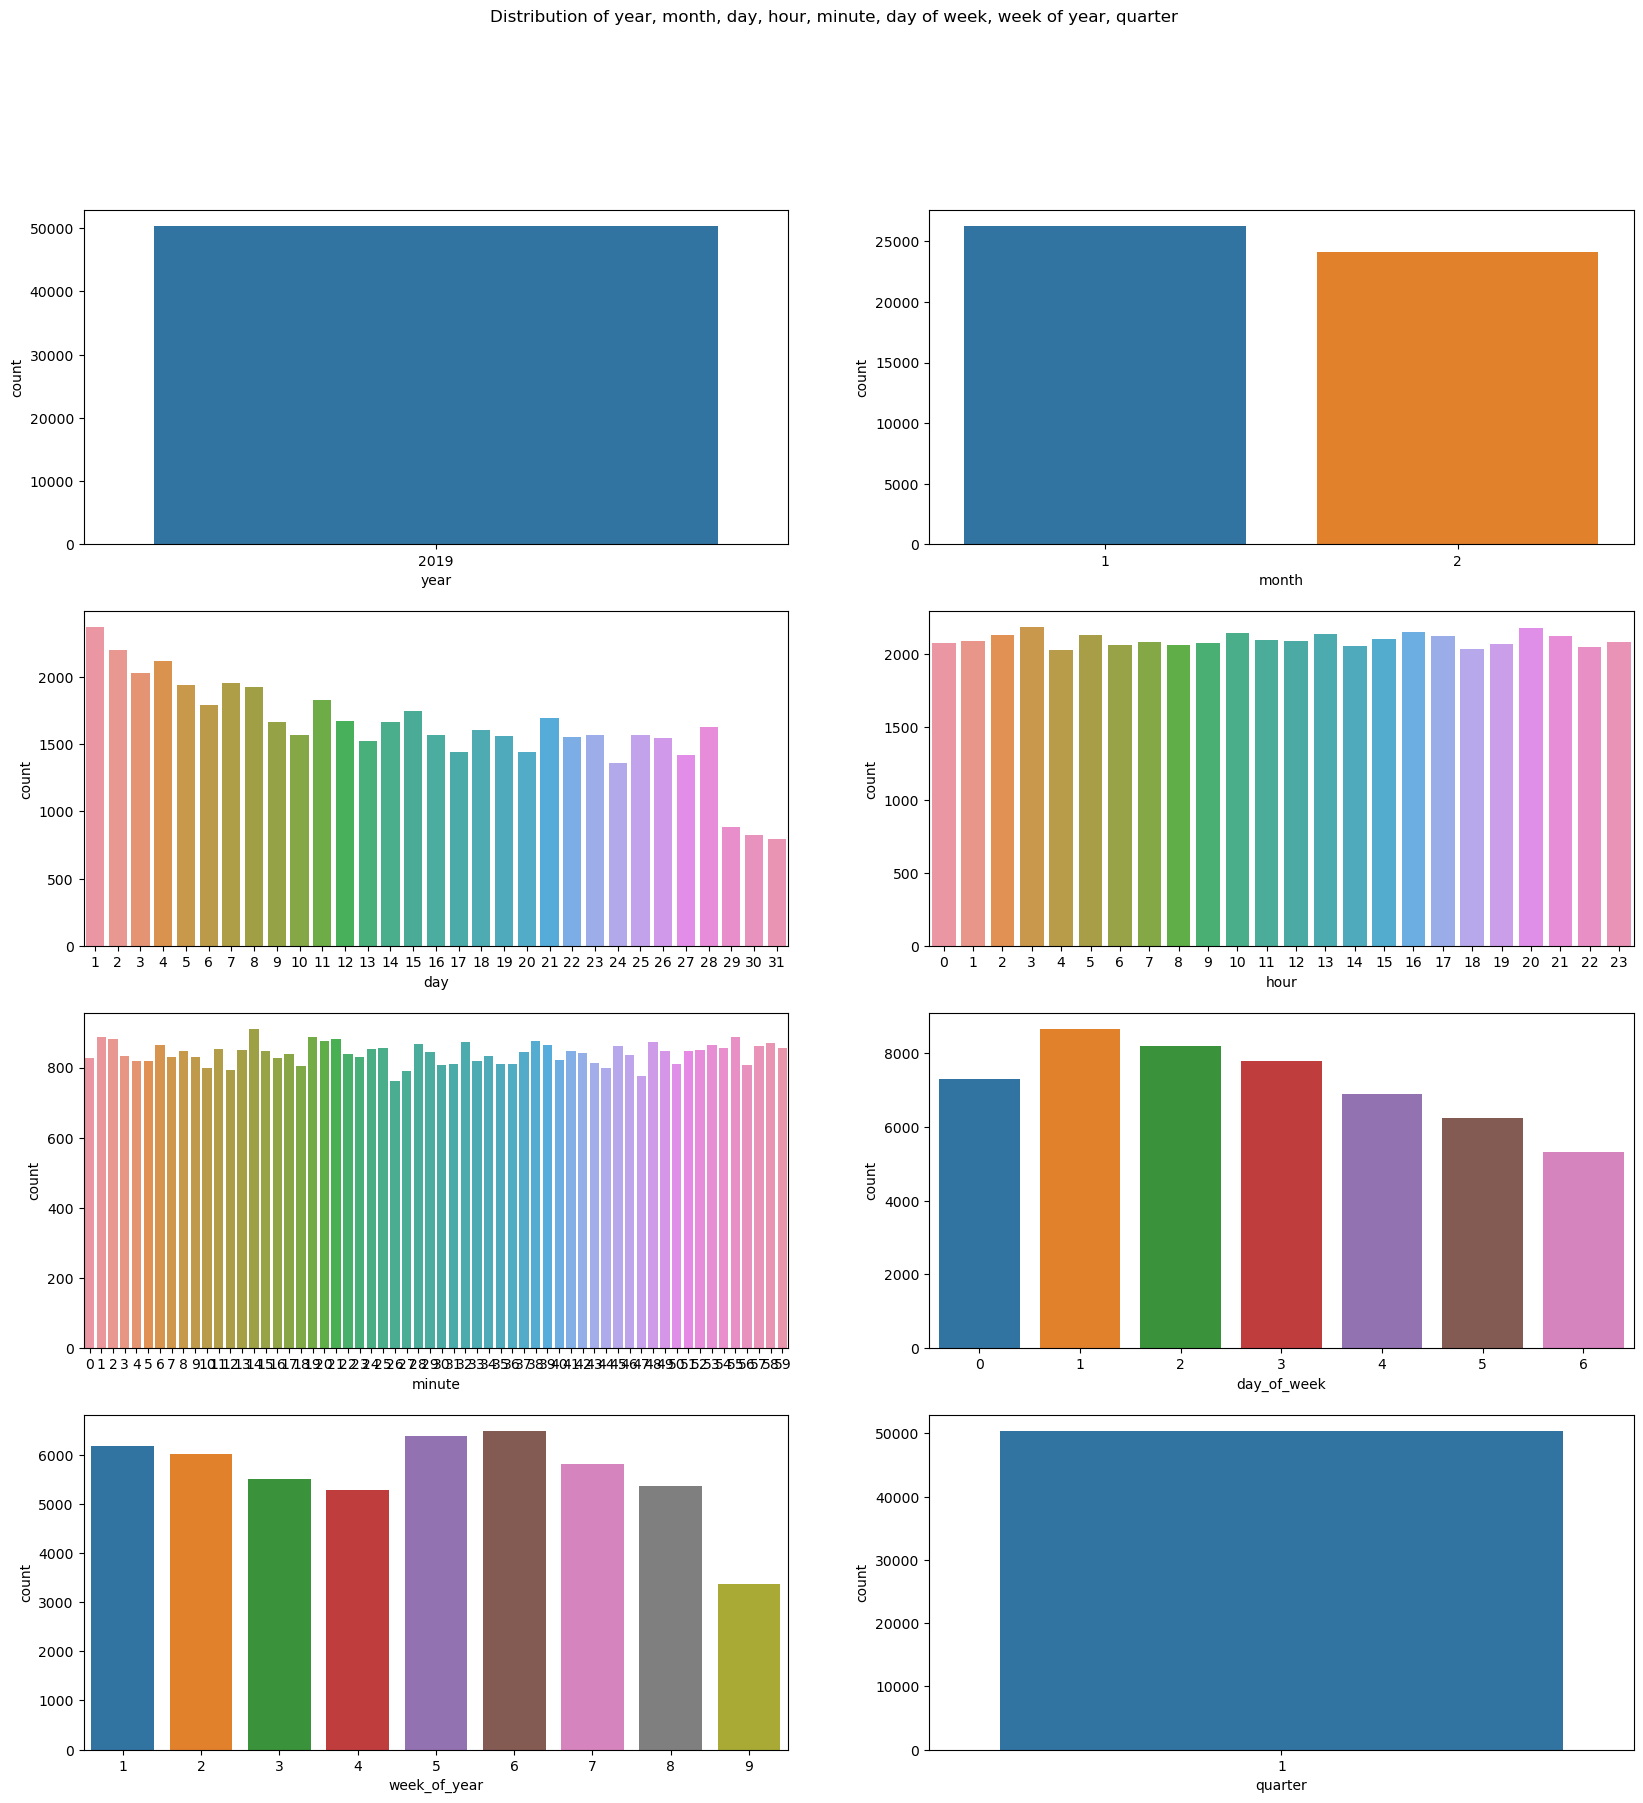

In [15]:
# Plot distribution of year, month, day, hour, minute, second, day of week, day of year, week of year, quarter

import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(4, 2, figsize=(20, 20))
fig.suptitle('Distribution of year, month, day, hour, minute, day of week, week of year, quarter')
sns.countplot(ax=axes[0, 0], x='year', data=data)
sns.countplot(ax=axes[0, 1], x='month', data=data)
sns.countplot(ax=axes[1, 0], x='day', data=data)
sns.countplot(ax=axes[1, 1], x='hour', data=data)
sns.countplot(ax=axes[2, 0], x='minute', data=data)
sns.countplot(ax=axes[2, 1], x='day_of_week', data=data)
sns.countplot(ax=axes[3, 0], x='week_of_year', data=data)
sns.countplot(ax=axes[3, 1], x='quarter', data=data)


The data belongs to the year 2019 and months from 1 (January) and 2 (February)

Since this belongs ot one quarter, we can remove the "quarter" feature from the data.

In [16]:
# Remove quarter from data

data.drop('quarter', axis=1, inplace=True)

---

##### column: country 

country of the user who is doing the transaction

In [17]:
data.country.value_counts()

country
Germany        30233
Switzerland    10338
Austria         9839
Name: count, dtype: int64

Text(0.5, 1.0, 'Country Distribution')

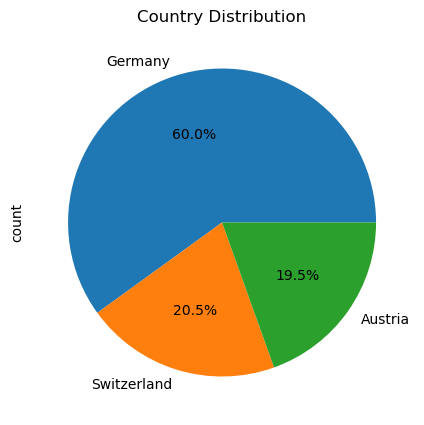

In [18]:
# Plot pie chart for country

plt.figure(figsize=(5, 5))
data.country.value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Country Distribution')

* 60% of the data is from Germany, 
* 20.5% from Switzerland,
* 19.5% from Austria.

---

##### column: amount 

In [19]:
data['amount'].describe()

count    50410.000000
mean       202.395715
std         96.274730
min          6.000000
25%        133.000000
50%        201.000000
75%        269.000000
max        630.000000
Name: amount, dtype: float64

Text(0.5, 1.0, 'Distribution of Amount')

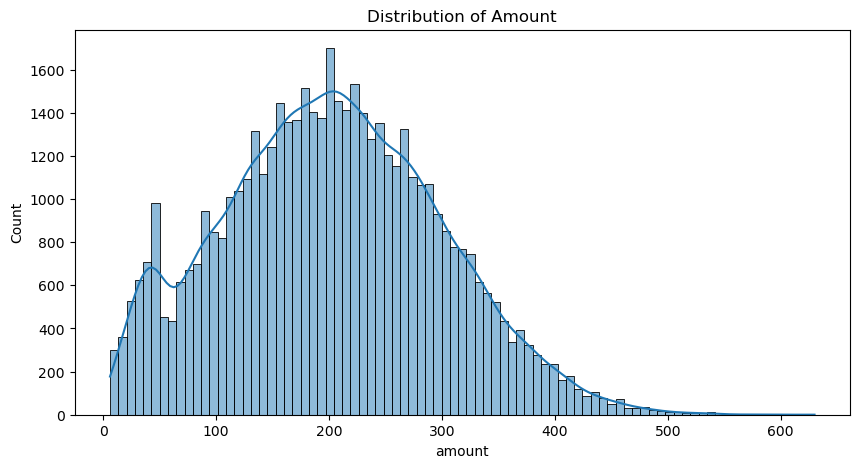

In [20]:
# Plot distribution of amount

plt.figure(figsize=(10, 5))
sns.histplot(data['amount'], kde=True)
plt.title('Distribution of Amount')

* Data has min transaction of amount 6 and max 630. 
* The distribution of the data is right skewed, which can identify as outliers. 


---

In [21]:
### success

data['success'].value_counts()

success
0    40182
1    10228
Name: count, dtype: int64

Text(0.5, 1.0, 'Success Distribution')

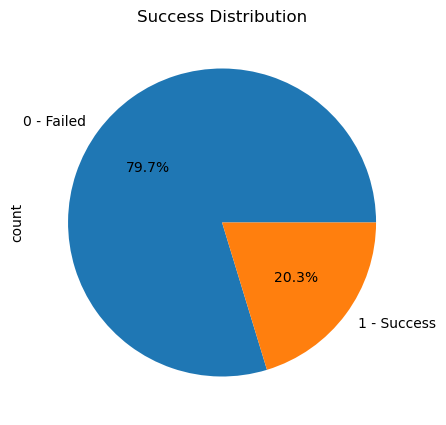

In [22]:
# Plot pie chart for success

plt.figure(figsize=(5, 5))
data.success.value_counts().rename(index={1: '1 - Success', 0: '0 - Failed'}).plot.pie(autopct='%1.1f%%')
plt.title('Success Distribution')


* Data has Successs rate of 20.3% and failure rate of 79.7%
* It shows the data is imbalanced. 

---

##### column: PSP 

- Payment Service Provider (PSP) is a third-party company that provides payment processing services to merchants.
- Each Payment attempt as cost involved. 

|      Name      | Fee on Successful Transactions | Fee on Failed Transactions |
|----------------|--------------------------------|---------------------------|
| Moneycard      | 5 Euro                         | 2 Euro                    |
| Goldcard       | 10 Euro                        | 5 Euro                    |
| UK_Card        | 3 Euro                         | 1 Euro                    |
| Simplecard     | 1 Euro                         | 0.5 Euro                  |


In [23]:
data['PSP'].value_counts()

PSP
UK_Card       26459
Simplecard    12446
Moneycard      8297
Goldcard       3208
Name: count, dtype: int64

In [24]:
data['PSP'].value_counts(normalize=True)

PSP
UK_Card       0.524876
Simplecard    0.246895
Moneycard     0.164590
Goldcard      0.063638
Name: proportion, dtype: float64

Text(0.5, 1.0, 'PSP Distribution')

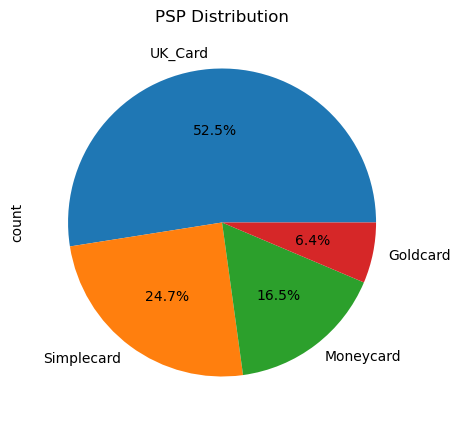

In [25]:
# Plot pie chart for PSP

plt.figure(figsize=(5, 5))
data.PSP.value_counts().plot.pie(autopct='%1.1f%%')
plt.title('PSP Distribution')


---

##### column: 3D_secured

- Whether the transaction was 3D secured or not.

In [26]:
data['3D_secured'].value_counts()

3D_secured
0    38399
1    12011
Name: count, dtype: int64

In [27]:
data['3D_secured'].value_counts(normalize=True)

3D_secured
0    0.761734
1    0.238266
Name: proportion, dtype: float64

Text(0.5, 1.0, '3D_secured Distribution')

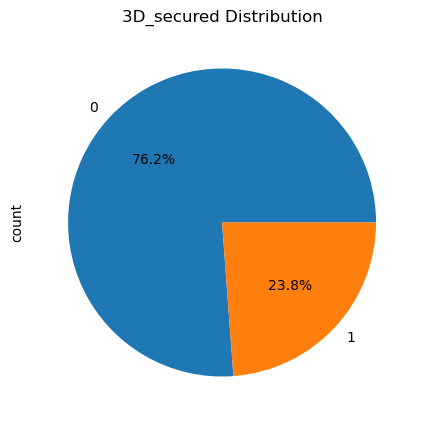

In [28]:
# plot pie chart for 3D_secured

plt.figure(figsize=(5, 5))
data['3D_secured'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('3D_secured Distribution')

3D_Secured transactions are less compared to non-3D secured transactions.
- 76.2% of the transactions are non-3D secured
- 23.8% of the transactions are 3D secured

---

##### column: card 

- The card used for the transaction

In [29]:
data['card'].value_counts()

card
Master    29002
Visa      11640
Diners     9768
Name: count, dtype: int64

In [30]:
data['card'].value_counts(normalize=True)

card
Master    0.575322
Visa      0.230907
Diners    0.193771
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Card Distribution')

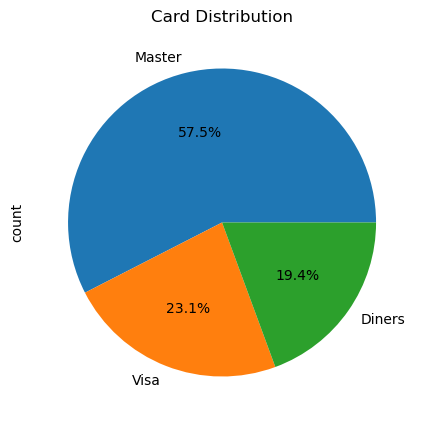

In [31]:
# plot pie chart for card

plt.figure(figsize=(5, 5))
data['card'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Card Distribution')

---

## Bi & Multi variate Analysis

In [32]:
data.head(3)

,tmsp,country,amount,success,PSP,3D_secured,card,year,month,day,hour,minute,day_of_week,week_of_year,day_of_year
0,2019-01-01 00:01:11,Germany,89,0,UK_Card,0,Visa,2019,1,1,0,1,1,1,1
1,2019-01-01 00:01:17,Germany,89,1,UK_Card,0,Visa,2019,1,1,0,1,1,1,1
2,2019-01-01 00:02:49,Germany,238,0,UK_Card,1,Diners,2019,1,1,0,2,1,1,1


In [33]:
# Show country with success and failure count and percentage

country_success = data.groupby(['country', 'success']).size().unstack()
country_success['total'] = country_success[0] + country_success[1]
country_success['success_percentage'] = (country_success[1] / country_success['total']) * 100
country_success['failure_percentage'] = (country_success[0] / country_success['total']) * 100
country_success

success,0,1,total,success_percentage,failure_percentage
country,,,,,
Austria,7826,2013,9839,20.459396,79.540604
Germany,24145,6088,30233,20.136936,79.863064
Switzerland,8211,2127,10338,20.574579,79.425421


In [34]:
# Show PSP with success and failure count and percentage

PSP_success = data.groupby(['PSP', 'success']).size().unstack()
PSP_success['total'] = PSP_success[0] + PSP_success[1]
PSP_success['success_percentage'] = (PSP_success[1] / PSP_success['total']) * 100
PSP_success['failure_percentage'] = (PSP_success[0] / PSP_success['total']) * 100
PSP_success


success,0,1,total,success_percentage,failure_percentage
PSP,,,,,
Goldcard,1905,1303,3208,40.617207,59.382793
Moneycard,6482,1815,8297,21.875377,78.124623
Simplecard,10478,1968,12446,15.812309,84.187691
UK_Card,21317,5142,26459,19.433841,80.566159


In [35]:
# Show Card with success and failure count and percentage

card_success = data.groupby(['card', 'success']).size().unstack()
card_success['total'] = card_success[0] + card_success[1]
card_success['success_percentage'] = (card_success[1] / card_success['total']) * 100
card_success['failure_percentage'] = (card_success[0] / card_success['total']) * 100
card_success


success,0,1,total,success_percentage,failure_percentage
card,,,,,
Diners,7590,2178,9768,22.297297,77.702703
Master,23379,5623,29002,19.388318,80.611682
Visa,9213,2427,11640,20.850515,79.149485


In [36]:
# Combine the data of country, PSP, card with success and failure count and percentage

country_PSP_card_success = data.groupby(['country', 'PSP', 'card', 'success']).size().unstack()
country_PSP_card_success['total'] = country_PSP_card_success[0] + country_PSP_card_success[1]
country_PSP_card_success['success_percentage'] = (country_PSP_card_success[1] / country_PSP_card_success['total']) * 100
country_PSP_card_success['failure_percentage'] = (country_PSP_card_success[0] / country_PSP_card_success['total']) * 100
country_PSP_card_success


success                           0     1  total  success_percentage  \
country     PSP        card                                            
Austria     Goldcard   Diners    65    64    129           49.612403   
                       Master   186   142    328           43.292683   
                       Visa      84    42    126           33.333333   
            Moneycard  Diners   233   105    338           31.065089   
                       Master   741   216    957           22.570533   
                       Visa     312    47    359           13.091922   
            Simplecard Diners   342   108    450           24.000000   
                       Master  1255   174   1429           12.176347   
                       Visa     434   101    535           18.878505   
            UK_Card    Diners   832   178   1010           17.623762   
                       Master  2399   587   2986           19.658406   
                       Visa     943   249   1192           20.889262   
Germany     Goldcard   Diners   241   156    397           39.294710   
                       Master   651   420   1071           39.215686   
                       Visa     283   188    471           39.915074   
            Moneycard  Diners   702   248    950           26.105263   
                       Master  2229   644   2873           22.415593   
                       Visa     973   164   1137           14.423923   
            Simplecard Diners  1085   316   1401           22.555318   
                       Master  3806   498   4304           11.570632   
                       Visa    1356   370   1726           21.436848   
            UK_Card    Diners  2462   537   2999           17.905969   
                       Master  7382  1798   9180           19.586057   
                       Visa    2975   749   3724           20.112782   
Switzerland Goldcard   Diners    77    67    144           46.527778   
                       Master   214   150    364           41.208791   
                       Visa     104    74    178           41.573034   
            Moneycard  Diners   274   105    379           27.704485   
                       Master   700   235    935           25.133690   
                       Visa     318    51    369           13.821138   
            Simplecard Diners   393   112    505           22.178218   
                       Master  1339   173   1512           11.441799   
                       Visa     468   116    584           19.863014   
            UK_Card    Diners   884   182   1066           17.073171   
                       Master  2477   586   3063           19.131570   
                       Visa     963   276   1239           22.276029   

success                        failure_percentage  
country     PSP        card                        
Austria     Goldcard   Diners           50.387597  
                       Master           56.707317  
                       Visa             66.666667  
            Moneycard  Diners           68.934911  
                       Master           77.429467  
                       Visa             86.908078  
            Simplecard Diners           76.000000  
                       Master           87.823653  
                       Visa             81.121495  
            UK_Card    Diners           82.376238  
                       Master           80.341594  
                       Visa             79.110738  
Germany     Goldcard   Diners           60.705290  
                       Master           60.784314  
                       Visa             60.084926  
            Moneycard  Diners           73.894737  
                       Master           77.584407  
                       Visa             85.576077  
            Simplecard Diners           77.444682  
                       Master           88.429368  
                       Visa             78.563152  
            UK_Card    Diners           82.094031  
               

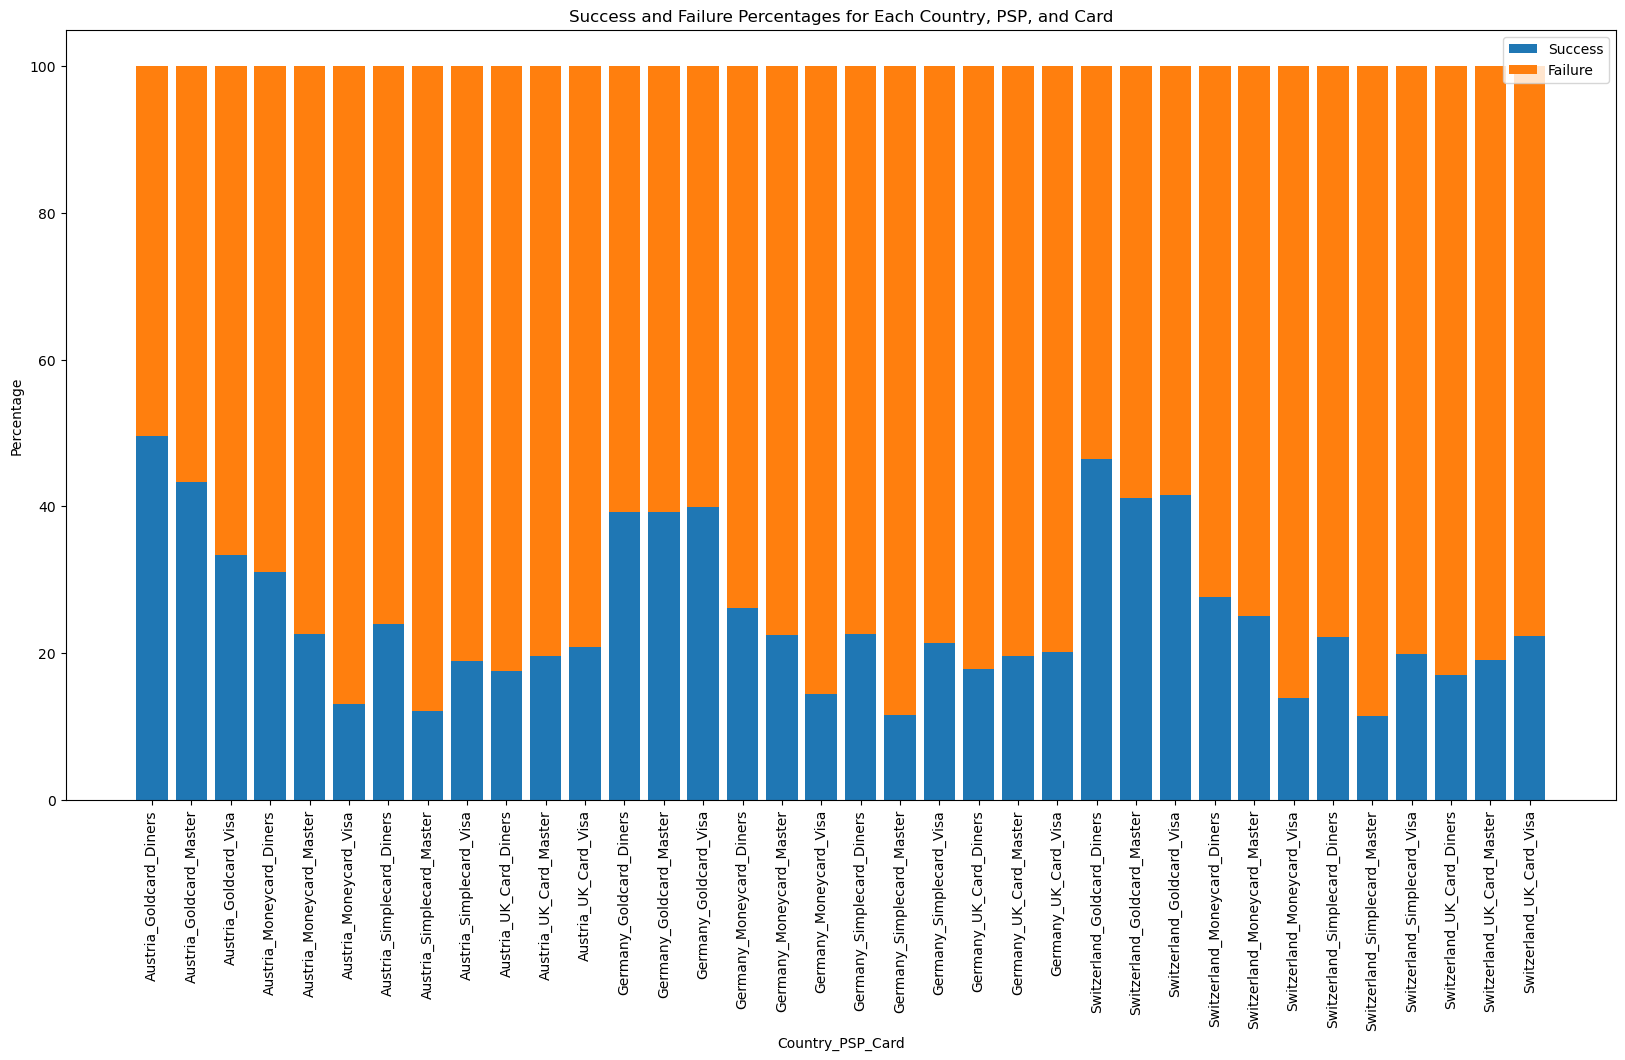

In [37]:
import matplotlib.pyplot as plt

# Reset the index of your DataFrame to make 'country', 'PSP', and 'card' into columns
country_PSP_card_success = country_PSP_card_success.reset_index()

# Create a new column that combines 'country', 'PSP', and 'card' for the x-axis
country_PSP_card_success['country_PSP_card'] = country_PSP_card_success['country'] + '_' + country_PSP_card_success['PSP'] + '_' + country_PSP_card_success['card']

# Plot the data
plt.figure(figsize=(20, 10))
plt.bar(country_PSP_card_success['country_PSP_card'], country_PSP_card_success['success_percentage'], label='Success')
plt.bar(country_PSP_card_success['country_PSP_card'], country_PSP_card_success['failure_percentage'], bottom=country_PSP_card_success['success_percentage'], label='Failure')
plt.xlabel('Country_PSP_Card')
plt.ylabel('Percentage')
plt.title('Success and Failure Percentages for Each Country, PSP, and Card')
plt.xticks(rotation=90)
plt.legend()
plt.show()

Text(0.5, 1.0, 'PSP vs Amount')

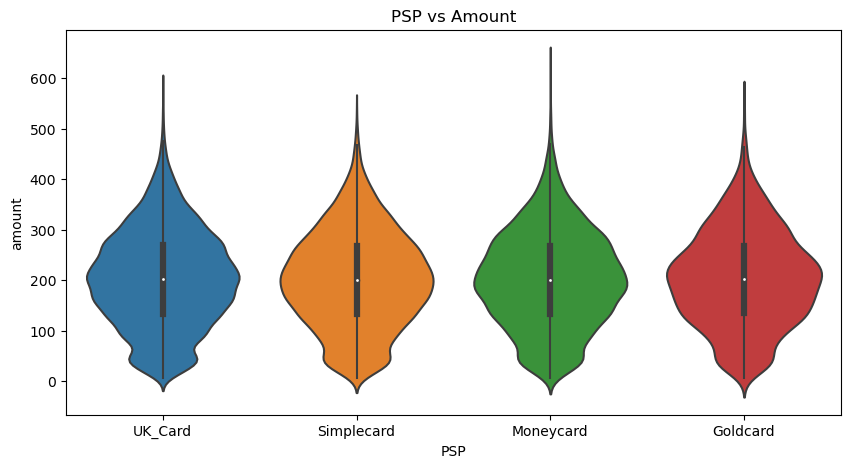

In [38]:
# Plot PSP vs Amount, Violin plot

plt.figure(figsize=(10, 5))
sns.violinplot(x='PSP', y='amount', data=data)
plt.title('PSP vs Amount')

Text(0.5, 1.0, 'Amount Distribution for each PSP')

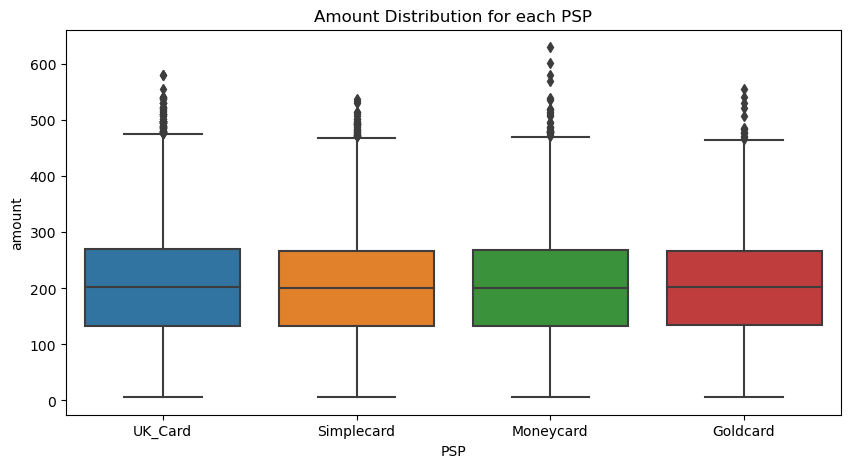

In [39]:
# Amount Distribution for each PSP

plt.figure(figsize=(10, 5))
sns.boxplot(x='PSP', y='amount', data=data)
plt.title('Amount Distribution for each PSP')


Text(0.5, 1.0, 'Transaction Counts by Country and Payment Method')

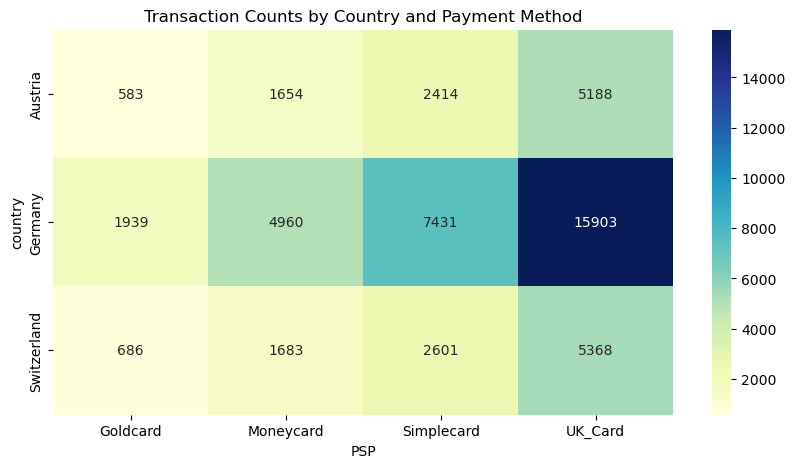

In [40]:
# Heatmap : Transaction Counts by Country and Payment Method

country_PSP = data.groupby(['country', 'PSP']).size().unstack()
plt.figure(figsize=(10, 5))
sns.heatmap(country_PSP, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Transaction Counts by Country and Payment Method')


In [41]:
# Features 

data.columns

Index(['tmsp', 'country', 'amount', 'success', 'PSP', '3D_secured', 'card',
       'year', 'month', 'day', 'hour', 'minute', 'day_of_week', 'week_of_year',
       'day_of_year'],
      dtype='object')

In [42]:
## Feature Engineering

In [43]:
"""
If two transactions are within one minute, with the same amount of money and from the same country,
it is (for a decent number of tries) safe to assume that they are payment attempts of the same purchase.
 """

'\nIf two transactions are within one minute, with the same amount of money and from the same country,\nit is (for a decent number of tries) safe to assume that they are payment attempts of the same purchase.\n '

In [44]:
data["payment_attempt"] = 1
data["is_PSP_changed"] = 0
data['diff_in_secs'] = 0

In [45]:
data_1 = data.groupby(['country', 'amount'])

In [46]:
def calculate_payment_attempt(group):
    # iterate each row in group

    for i in range(1, len(group)):
        # sort the group by timestamp
        group = group.sort_values(by='tmsp')
        # if the time difference is less than 60 seconds
        if (group.iloc[i]['tmsp'] - group.iloc[i-1]['tmsp']).seconds < 60:
            group.at[group.index[i], 'payment_attempt'] = group.at[group.index[i-1], 'payment_attempt']+1
            group.at[group.index[i], 'diff_in_secs'] = (group.iloc[i]['tmsp'] - group.iloc[i-1]['tmsp']).seconds

        # check is PSP changed
        if group.iloc[i]['PSP'] != group.iloc[i-1]['PSP']:
            group.at[group.index[i], 'is_PSP_changed'] = 1

        # calculate time difference
            

    return group

In [47]:
data_1 = data_1.apply(calculate_payment_attempt)

In [48]:
data_1 = data_1.reset_index(drop=True)

In [49]:
data_2 = data_1.groupby(['PSP'])

In [50]:
import datetime
# For each PSP calculate number of transactions happened in last 60 seco

def calculate_PSP_load(group):
    # iterate each row in group

    group = group.sort_values(by='tmsp')
    for i in range(1, len(group)):
        
        # Get the current timestamp
        current_timestamp = group.iloc[i]['tmsp'] 

        # Calculate the timestamp 60 seconds ago
        previous_timestamp = current_timestamp - datetime.timedelta(seconds=120)

        # Print the previous timestamp
        # print(previous_timestamp)

        # count of data within the range of  60 secs
        server_load = group[(group['tmsp'] >= previous_timestamp) & (group['tmsp'] <= current_timestamp)].shape[0]

        # Assign the server load to the current row
        group.at[group.index[i], 'server_load'] = server_load
    return group
        

In [51]:
data_2 = data_2.apply(calculate_PSP_load)

In [52]:
# Server Load desc 

data_2['server_load'].describe()

count    50406.000000
mean         1.480498
std          0.749994
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          7.000000
Name: server_load, dtype: float64

In [53]:
transaction_df = data_2.reset_index(drop=True)

##### Anomaly with Isoloation Forest 

In [54]:
# Create a new column with whether is it anomaly or not with Isolation Forest

from sklearn.ensemble import IsolationForest


In [55]:
transaction_df.columns


Index(['tmsp', 'country', 'amount', 'success', 'PSP', '3D_secured', 'card',
       'year', 'month', 'day', 'hour', 'minute', 'day_of_week', 'week_of_year',
       'day_of_year', 'payment_attempt', 'is_PSP_changed', 'diff_in_secs',
       'server_load'],
      dtype='object')

In [56]:
isof_feats = ["country", "amount", "PSP", "3D_secured", "card"]

In [57]:
transaction_df[isof_feats].head(3)

,country,amount,PSP,3D_secured,card
0,Switzerland,277,Goldcard,0,Diners
1,Austria,34,Goldcard,0,Visa
2,Germany,257,Goldcard,1,Master


In [58]:
isof_model = IsolationForest(contamination=0.01, random_state=42)
oh_encoding = ce.OneHotEncoder(cols=['country','PSP','card'])
transaction_isof_df = oh_encoding.fit_transform(transaction_df[isof_feats])

transaction_isof_df['is_anomaly'] = isof_model.fit_predict(transaction_isof_df)

In [59]:
# save the isoforest model and one hot encoder

import joblib

joblib.dump(oh_encoding, "models/soh_encoding.pkl")
joblib.dump(isof_model, "models/isof_model.pkl")



['models/isof_model.pkl']

In [60]:
transaction_isof_df.head()

,country_1,country_2,country_3,amount,PSP_1,PSP_2,PSP_3,PSP_4,3D_secured,card_1,card_2,card_3,is_anomaly
0,1,0,0,277,1,0,0,0,0,1,0,0,-1
1,0,1,0,34,1,0,0,0,0,0,1,0,-1
2,0,0,1,257,1,0,0,0,1,0,0,1,1
3,0,0,1,310,1,0,0,0,0,0,1,0,1
4,0,0,1,192,1,0,0,0,1,1,0,0,1


In [61]:
transaction_df["isof_flag"] = transaction_isof_df["is_anomaly"]

In [62]:
transaction_df[['isof_flag','success']].value_counts()

isof_flag  success
 1         0          39897
           1          10008
-1         0            285
           1            220
Name: count, dtype: int64

Text(0.5, 1.0, 'Correlation between numerical columns')

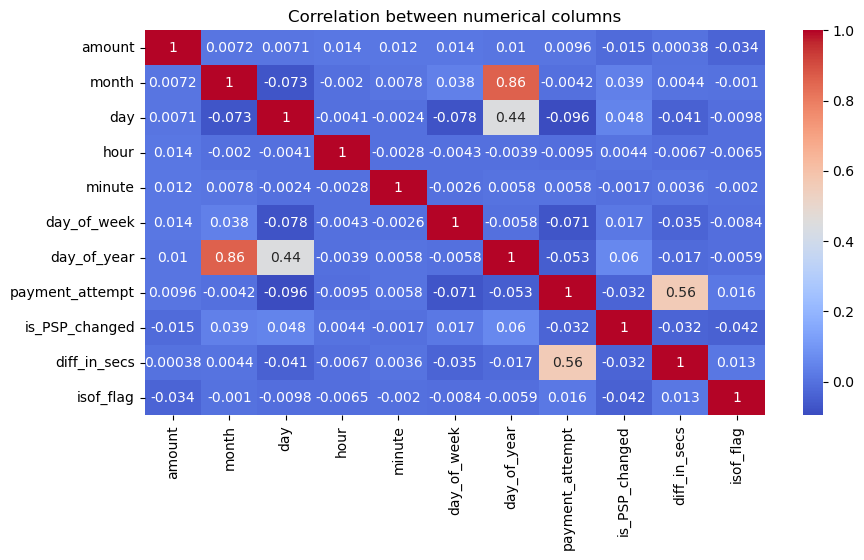

In [63]:
# Correleation between numerical columns
num_cols = ['amount', 'month','day', 'hour', 'minute','day_of_week','day_of_year', 
            'payment_attempt', 'is_PSP_changed', 
            'diff_in_secs','isof_flag']
corr = transaction_df[num_cols].corr()
plt.figure(figsize=(10, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation between numerical columns')


In [64]:
transaction_df.to_csv("Cleaned_data.csv", index=False)